In [50]:
import numpy as np
from scipy.optimize import linprog as lp
from matplotlib import pyplot as plt
from tolsolvty import tolsolvty
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [57]:
A = np.array([[2, 4, -1],
              [1, 3, -3],
              [1, 5,  -8]])

print(f'A =\n{A}\n')
mid_b = np.array([5, -1, 3])
rad_b = np.array([2, 1, 2])


inf_b = (mid_b - rad_b).reshape(3,1)
sup_b = (mid_b + rad_b).reshape(3,1)

print(f'inf_b =\n{inf_b}\n')
print(f'sup_b =\n{sup_b}\n')

A =
[[ 2  4 -1]
 [ 1  3 -3]
 [ 1  5 -8]]

inf_b =
[[ 3]
 [-2]
 [ 1]]

sup_b =
[[7]
 [0]
 [5]]



In [58]:
[tolmax, argmax, envs, ccode] = tolsolvty(A, A, inf_b, sup_b)
print('tolmax = ', tolmax)
print('argmax = ', argmax)
print('envs = ', envs)
print('ccode = ', ccode)

 
 Допусковое множество решений интервальной линейной системы пусто 
 
tolmax =  [-0.80000109]
argmax =  [[0.32545509]
 [0.46363712]
 [0.30545512]]
envs =  [[ 2.         -0.80000109]
 [ 3.         -0.80000028]
 [ 1.         -0.79999645]]
ccode =  3


In [59]:
n = mid_b.shape[0]
c = np.hstack([np.zeros(n), np.ones(n)])
neg_diag = -np.diag(rad_b)
r = np.hstack([-mid_b, mid_b])
C = np.block([[-A, neg_diag], [A, neg_diag]])
C

array([[-2, -4,  1, -2,  0,  0],
       [-1, -3,  3,  0, -1,  0],
       [-1, -5,  8,  0,  0, -2],
       [ 2,  4, -1, -2,  0,  0],
       [ 1,  3, -3,  0, -1,  0],
       [ 1,  5, -8,  0,  0, -2]])

In [60]:
def solve(x_bounds=[(None, None)]*n , method='interior-point'):
    bounds = x_bounds + [(0, None)] * n

    result = lp(c, 
                C, 
                r, 
                bounds=bounds,
                method=method,
               ).x
    
    return result

In [62]:
res = solve()
print('interior-point')
print(f'x = {res[:3]}')
print(f'w = {res[3:]}')
print(f'sum_w = {res[3:].sum()}')
print('')

res = solve(method='simplex')
print('simplex')
print(f'x = {res[:3]}')
print(f'w = {res[3:]}')
print(f'sum_w = {res[3:].sum()}')

interior-point
x = [0.60055354 1.03672951 0.34802514]
w = [2.71333845e-11 3.66666667e+00 1.13627270e-10]
sum_w = 3.6666666667025662

simplex
x = [0.         1.37037037 0.48148148]
w = [0.         3.66666667 0.        ]
sum_w = 3.666666666666667


In [63]:
step = 0.2
ip = []
sim = []
for x_2 in np.arange(-1, 1, step):
    bounds = [(None, None), (x_2, x_2+step), (None, None)]
    res = solve(x_bounds=bounds)
    ip.append(res)
    print('interior-point')
    print(f'x = {res[:3]}')
    print(f'w = {res[3:]}')
    
    print('\n')
    res = solve(x_bounds=bounds, method='simplex')
    sim.append(res)
    print('simplex')
    print(f'x = {res[:3]}')
    print(f'w = {res[3:]}')
    
    print('\n')
    
ip = np.array(ip)
sim = np.array(sim)

interior-point
x = [ 4.03723331 -0.87253703 -0.41568148]
w = [1.47301641e-11 3.66666667e+00 2.49884050e-10]


simplex
x = [ 3.90666667 -0.8        -0.38666667]
w = [0.         3.66666667 0.        ]


interior-point
x = [ 3.68089712 -0.67457247 -0.33649566]
w = [7.08124823e-12 3.66666667e+00 5.85320961e-11]


simplex
x = [ 3.54666667 -0.6        -0.30666667]
w = [0.         3.66666667 0.        ]


interior-point
x = [ 3.32877428 -0.47894868 -0.25824614]
w = [9.58672469e-12 3.66666667e+00 7.83428305e-11]


simplex
x = [ 3.18666667 -0.4        -0.22666667]
w = [0.         3.66666667 0.        ]


interior-point
x = [ 2.97503043 -0.28242431 -0.17963639]
w = [1.42397491e-11 3.66666667e+00 1.75602796e-10]


simplex
x = [ 2.82666667 -0.2        -0.14666667]
w = [0.         3.66666667 0.        ]


interior-point
x = [ 2.62041428 -0.08541534 -0.1008328 ]
w = [1.81577049e-11 3.66666667e+00 2.88970687e-10]


simplex
x = [ 2.46666667e+00 -1.66533454e-16 -6.66666667e-02]
w = [0.         3.666666

In [64]:
def drow(ip, sim, num):
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))
    
    for i in range(3):
        if i != num:
            ax[0].plot(ip[:, num], ip[:, i], label=f'x{i+1}')
            
    ax[0].plot(ip[:, num], ip[:, 3:].sum(axis=1), label='sum_w')
    ax[0].plot(ip[:, num], ip[:, num+3], label=f'w{num+1}')
    ax[0].set_ylabel('value')
    ax[0].set_xlabel(f'x{num+1}')
    ax[0].set_title('interior-point')
    ax[0].grid()
    ax[0].legend()
    
    for i in range(3):
        if i != num:
            ax[1].plot(sim[:, num], sim[:, i], label=f'x{i+1}')
    ax[1].plot(sim[:, num], sim[:, 3:].sum(axis=1), label='sum_w')
    ax[1].plot(sim[:, num], sim[:, num+3], label=f'w{num+1}')
    ax[1].set_ylabel('value')
    ax[1].set_xlabel(f'x{num+1}')
    ax[1].set_title('simplex')
    ax[1].grid()
    ax[1].legend()
    
    fig.show()

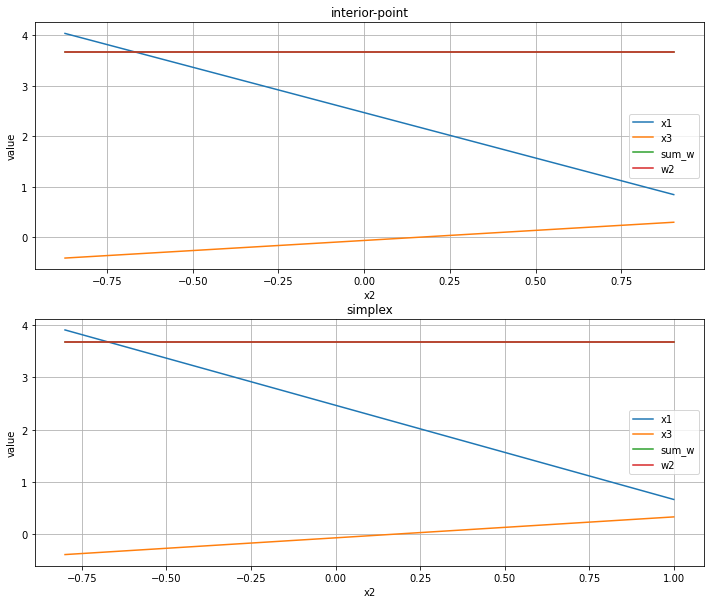

In [65]:
drow(ip, sim, 1)

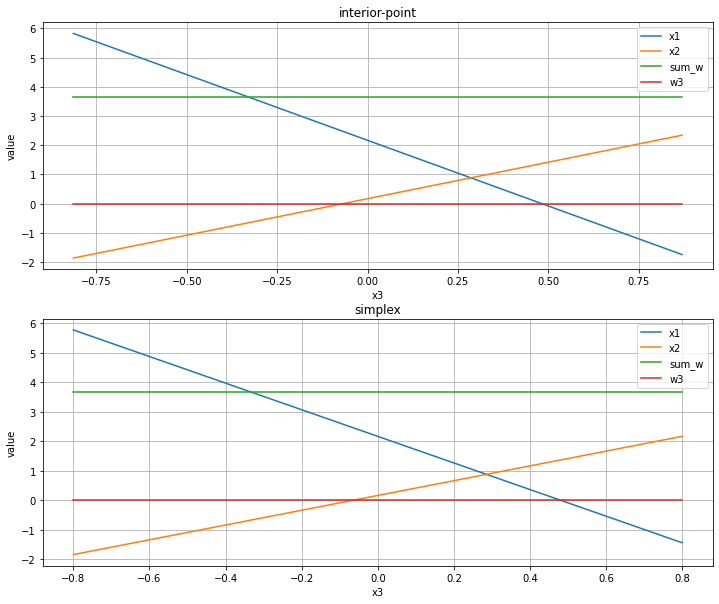

In [66]:
step = 0.2
ip = []
sim = []
for x_3 in np.arange(-1, 1, step):
    bounds = [(None, None), (None, None), (x_3, x_3+step)]
    res = solve(x_bounds=bounds)
    ip.append(res)
    #print('interior-point')
    #print(f'x = {res[:3]}')
    #print(f'w = {res[3:]}')
    
    #print('\n')
    res = solve(x_bounds=bounds, method='simplex')
    sim.append(res)
    #print('simplex')
    #print(f'x = {res[:3]}')
    #print(f'w = {res[3:]}')
    
    #print('\n')
    
ip = np.array(ip)
sim = np.array(sim)

drow(ip, sim, 2)

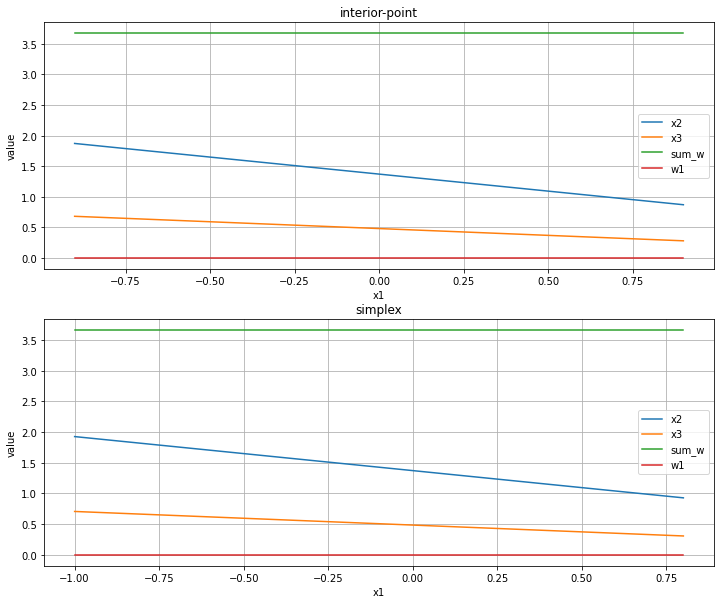

In [67]:
step = 0.2
ip = []
sim = []
for x_1 in np.arange(-1, 1, step):
    bounds = [(x_1, x_1+step), (None, None), (None, None)]
    res = solve(x_bounds=bounds)
    ip.append(res)
    #print('interior-point')
    #print(f'x = {res[:3]}')
    #print(f'w = {res[3:]}')
    
    #print('\n')
    res = solve(x_bounds=bounds, method='simplex')
    sim.append(res)
    #print('simplex')
    #print(f'x = {res[:3]}')
    #print(f'w = {res[3:]}')
    
    #print('\n')
    
ip = np.array(ip)
sim = np.array(sim)

drow(ip, sim, 0)